In [13]:
import numpy as np
import pandas as pd
import os
from PIL import Image

ModuleNotFoundError: No module named 'PIL'

In [10]:
!pip install PIL 

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for PIL


In [8]:
!pip install pandas 

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -----------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install numpy

   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.3 MB 189.4 kB/s eta 0:01:03
   -- ------------------------------------- 0.8/12.3 MB 328.7 kB/s eta 0:00:36
  


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install pandas

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7294 sha256=84fb423a4bcf088a1d952b25ebda710b9b0cf3b35d4cc68ef0213ad279974838
  Stored in directory: c:\users\tumul\appdata\local\pip\cache\wheels\53\7c\f7\d3267739bc9dfdfc43724391337c9955e7d5b5830888d735e3
Successfully built panda

   ---------------------------------------- 0/7 [urllib3]
   ---------------------------------------- 0/7 [urllib3]
   ---------------------------------------- 0/7 [urllib3]
   ---------------------------------------- 0/7 [urllib3]
   --------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install os 

ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


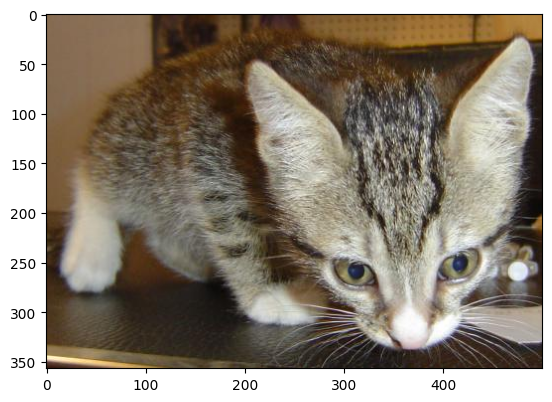

In [13]:
#load cat and dogs images from directory
img_dir = '/Users/ankitsahu/Desktop/local_perso_exp/housing/data/PetImages'
cat_images = os.listdir(img_dir + '/Cat')
dog_images = os.listdir(img_dir + '/Dog')

#load a sample image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_dir + '/Cat/300.jpg')
plt.imshow(img)

In [ ]:
#load cat and dog images into a dataframe for training as X and y
def load_images_to_df(base_dir, img_size=(64, 64)):
    data = []
    labels = []

    for label, category in enumerate(["Cat", "Dog"]):
        folder = os.path.join(base_dir, category)

        for file in os.listdir(folder):
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                img_path = os.path.join(folder, file)

                img = Image.open(img_path).convert("L")  # grayscale
                img = img.resize(img_size)

                img_array = np.array(img).flatten()
                data.append(img_array)
                labels.append(category)

    df = pd.DataFrame(data)
    df["label"] = labels
    return df

In [ ]:
df = load_images_to_df(img_dir)

print(df.shape)
df.head()

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

def load_images(base_dir, img_size=(64, 64)):
    X = []
    y = []

    label_map = {"Cat": 0, "Dog": 1}

    for category in ["Cat", "Dog"]:
        folder = os.path.join(base_dir, category)

        for file in os.listdir(folder):
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                try:
                    img = Image.open(os.path.join(folder, file)).convert("L")
                    img = img.resize(img_size)

                    img_array = np.array(img, dtype=np.float32) / 255.0
                    img_array = img_array.reshape(64, 64, 1)

                    X.append(img_array)
                    y.append(label_map[category])
                except:
                    pass

    return np.array(X), np.array(y)

In [54]:
X, y = load_images(img_dir)

In [ ]:
X.shape , y.shape

((24998, 64, 64, 1), (24998,))

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(14998, 64, 64, 1) (5000, 64, 64, 1) (5000, 64, 64, 1)
(14998,) (5000,) (5000,)


In [35]:
# encode the labels
df['label_binary'] = df['label'].map({'Cat': 0, 'Dog': 1})
df

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,label,label_binary
0,178,171,137,172,173,148,165,111,91,96,...,68,68,65,63,172,164,147,168,Cat,0
1,101,89,92,90,96,98,101,105,104,105,...,13,13,12,13,14,11,9,29,Cat,0
2,84,84,83,83,83,83,81,81,82,85,...,192,202,216,206,192,183,171,157,Cat,0
3,131,103,101,103,104,107,108,109,110,112,...,252,247,254,254,254,249,250,248,Cat,0
4,50,59,72,92,115,121,106,116,136,110,...,119,111,191,188,134,135,168,150,Cat,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,211,207,208,214,222,225,222,222,227,226,...,210,217,210,201,195,199,207,195,Dog,1
24994,39,39,39,39,39,40,40,40,41,41,...,62,45,40,41,40,40,41,42,Dog,1
24995,146,148,148,142,142,140,140,129,116,113,...,217,217,216,216,214,216,215,213,Dog,1
24996,204,196,192,193,198,203,206,210,210,209,...,136,131,130,133,137,136,130,123,Dog,1


In [36]:
# split the data into train and val and test
from sklearn.model_selection import train_test_split
X, y = df.drop(['label', 'label_binary'], axis=1), df['label_binary']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(14998, 4096) (5000, 4096) (5000, 4096)
(14998,) (5000,) (5000,)


In [40]:
# train an XGBOOST model for classification
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",   # important for loss plotting
    use_label_encoder=False
)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=False
)



/opt/homebrew/Caskroom/miniconda/base/envs/env_ankit/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:16:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, ...)

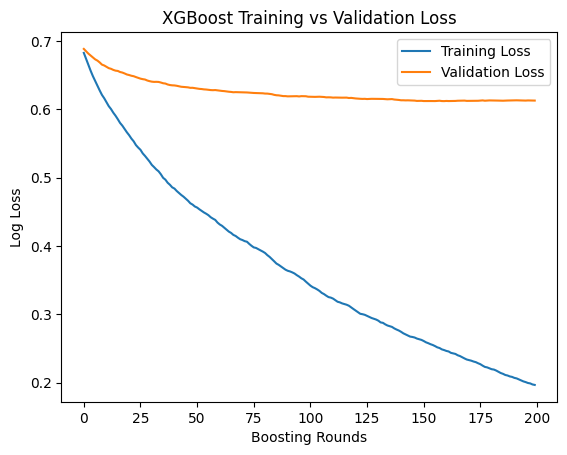

In [41]:
results = xgb_model.evals_result()

train_loss = results["validation_0"]["logloss"]
val_loss = results["validation_1"]["logloss"]

plt.figure()
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Boosting Rounds")
plt.ylabel("Log Loss")
plt.legend()
plt.title("XGBoost Training vs Validation Loss")
plt.show()

In [42]:
# predict the labels on val set
y_val_pred = xgb_model.predict(X_val)

# evaluate the model
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Validation Classification Report:\n{classification_report(y_val, y_val_pred)}")

Validation Accuracy: 0.6682
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      2515
           1       0.66      0.67      0.67      2485

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



In [1]:
# train a CNN model for classification
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    batch_size=32,
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
# plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')


ModuleNotFoundError: No module named 'keras'

In [64]:
# predict on test set, convert to binary and evaluate the model
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.5).astype(int)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Test Classification Report:\n{classification_report(y_test, y_test_pred)}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Test Accuracy: 0.7388
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      2503
           1       0.73      0.76      0.74      2497

    accuracy                           0.74      5000
   macro avg       0.74      0.74      0.74      5000
weighted avg       0.74      0.74      0.74      5000

